<a href="https://colab.research.google.com/github/RomualdKouadio/Analyse_des_donnees_de_ventes_domaine_de_la_distribution/blob/main/Mod%C3%A9lisation_pr%C3%A9dictive_de_la_BRVM10_avec_Facebook_Prophet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
# Importation des librairies nécessaires
import pandas as pd
import numpy as np
import datetime
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
# Charger les données 
data = pd.read_excel("C:/Users/Romual/Desktop/IDSI/EXAMEN SERIES TEMPORELLES/BRVM10.xlsx", index_col=False)
data.head()

,date,obs,brvm10
0,1998-09-18,1,103.88
1,1998-09-21,2,105.92
2,1998-09-23,3,105.26
3,1998-09-25,4,106.51
4,1998-09-28,5,104.74


In [ ]:
data.tail()

,date,obs,brvm10
5389,2021-06-14,5390,132.42
5390,2021-06-15,5391,132.84
5391,2021-06-16,5392,132.81
5392,2021-06-17,5393,131.94
5393,2021-06-18,5394,132.12


In [ ]:
# les dimensions de notre dataset
data.shape

(5394, 3)

In [ ]:
# Aperçu des colonnes
data.columns

Index(['date', 'obs', 'brvm10'], dtype='object')

In [ ]:
# Supprimer la colonne "obs"
data = data.drop('obs', axis=1)

In [ ]:
data.head(3)

,date,brvm10
0,1998-09-18,103.88
1,1998-09-21,105.92
2,1998-09-23,105.26


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5394 non-null   datetime64[ns]
 1   brvm10  5394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 84.4 KB


In [ ]:
data.date.isnull().any()

False

In [ ]:
data["date"] = pd.to_datetime(data["date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5394 entries, 0 to 5393
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5394 non-null   datetime64[ns]
 1   brvm10  5394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 84.4 KB


In [ ]:
# Observons les statistiques descriptives de notre dataset
data["brvm10"].describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

count    5394.000000
mean      167.042329
std        65.199493
min        71.380000
1%         72.388600
5%         76.000000
10%        78.563000
25%       113.572500
30%       124.830000
40%       146.298000
50%       163.800000
60%       180.424000
75%       220.215000
85%       249.740500
90%       260.914000
99%       298.393100
max       315.180000
Name: brvm10, dtype: float64

In [ ]:
# L'évolution de la BRVM10
px.area(x="date", y="brvm10", data_frame=data)

In [ ]:
data_prophet = data.rename(columns = {"date":"ds", "brvm10":"y"})
data_prophet

,ds,y
0,1998-09-18,103.88
1,1998-09-21,105.92
2,1998-09-23,105.26
3,1998-09-25,106.51
4,1998-09-28,104.74
...,...,...
5389,2021-06-14,132.42
5390,2021-06-15,132.84
5391,2021-06-16,132.81
5392,2021-06-17,131.94


In [ ]:
# Modélisation

# Initialisation de Facebook Prophet
model = Prophet()

# Entrainement 
model.fit(data_prophet)

16:47:24 - cmdstanpy - INFO - Chain [1] start processing
16:47:39 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Jeu de données pour le forecast
future = model.make_future_dataframe(periods=365)
future

,ds
0,1998-09-18
1,1998-09-21
2,1998-09-23
3,1998-09-25
4,1998-09-28
...,...
5754,2022-06-14
5755,2022-06-15
5756,2022-06-16
5757,2022-06-17


In [ ]:
# Les prévisions des prix du BRVM10 sur une période +365 jours (1an)
prévisions = model.predict(future)
prévisions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1998-09-18,102.885153,90.600036,115.737414,102.885153,102.885153,0.575104,0.575104,0.575104,0.293206,0.293206,0.293206,0.281898,0.281898,0.281898,0.0,0.0,0.0,103.460257
1,1998-09-21,102.791578,90.064278,115.692898,102.791578,102.791578,0.105354,0.105354,0.105354,0.272529,0.272529,0.272529,-0.167175,-0.167175,-0.167175,0.0,0.0,0.0,102.896932
2,1998-09-23,102.729195,89.975593,115.750104,102.729195,102.729195,-0.226182,-0.226182,-0.226182,0.246450,0.246450,0.246450,-0.472632,-0.472632,-0.472632,0.0,0.0,0.0,102.503013
3,1998-09-25,102.666811,88.763153,115.328895,102.666811,102.666811,-0.483175,-0.483175,-0.483175,0.293206,0.293206,0.293206,-0.776381,-0.776381,-0.776381,0.0,0.0,0.0,102.183636
4,1998-09-28,102.573236,88.394614,115.570875,102.573236,102.573236,-0.945567,-0.945567,-0.945567,0.272529,0.272529,0.272529,-1.218096,-1.218096,-1.218096,0.0,0.0,0.0,101.627669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,2022-06-14,66.186233,40.901904,102.609568,38.845963,95.433092,4.870684,4.870684,4.870684,0.163277,0.163277,0.163277,4.707407,4.707407,4.707407,0.0,0.0,0.0,71.056917
5755,2022-06-15,66.098404,40.070504,104.107431,38.637883,95.555492,4.866474,4.866474,4.866474,0.246450,0.246450,0.246450,4.620024,4.620024,4.620024,0.0,0.0,0.0,70.964878
5756,2022-06-16,66.010575,40.527403,103.558625,38.471187,95.447155,4.815961,4.815961,4.815961,0.294136,0.294136,0.294136,4.521825,4.521825,4.521825,0.0,0.0,0.0,70.826536
5757,2022-06-17,65.922746,40.388672,104.062807,38.304492,95.323104,4.707334,4.707334,4.707334,0.293206,0.293206,0.293206,4.414128,4.414128,4.414128,0.0,0.0,0.0,70.630080


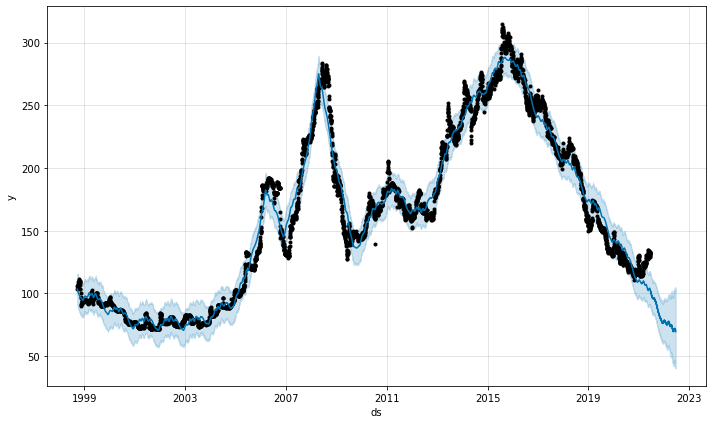

In [ ]:
fig = model.plot(prévisions)

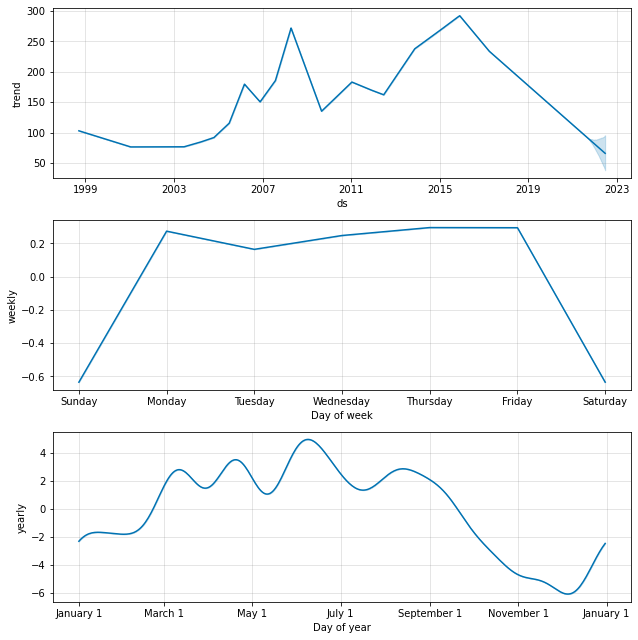

In [ ]:
fig2 = model.plot_components(prévisions)

Dans le graphique ci-dessous, les lignes pointillées représentent les points de changement pour la série chronologique donnée.

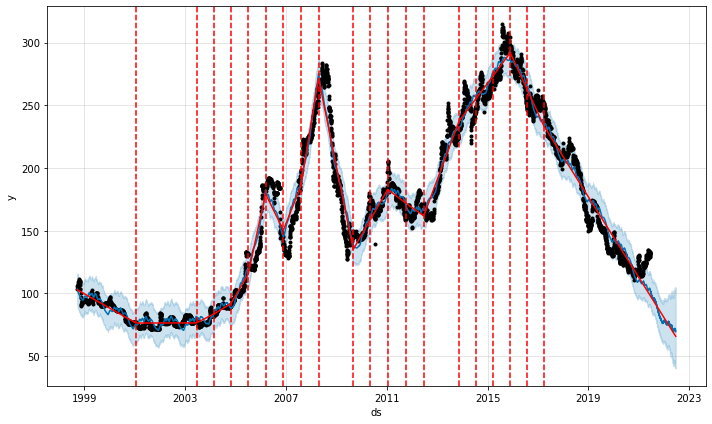

In [ ]:
fig3 = model.plot(prévisions)
a = add_changepoints_to_plot(fig3.gca(), model, prévisions)

In [ ]:
data_merge = pd.merge(data_prophet, prévisions[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
data_merge = data_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
data_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,1998-09-18,90.600036,115.737414,103.460257,103.88
1,1998-09-21,90.064278,115.692898,102.896932,105.92
2,1998-09-23,89.975593,115.750104,102.503013,105.26
3,1998-09-25,88.763153,115.328895,102.183636,106.51
4,1998-09-28,88.394614,115.570875,101.627669,104.74


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# calculer la MAE entre les valeurs observées et prédites
y_true = data_merge['y'].values
y_pred = data_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)

In [ ]:
mae_01

7.719469818638558